#### Maulidio Farhan Rizkullah
#### 2141720041
#### 19
#### TI-3F

## Tugas

1. Menggunakan data 'Mall_customers.csv'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

datasets = pd.read_csv('../docs/Mall_Customers.csv')

datasets.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Menentukan fitur yang tepat untuk melakukan clustering

In [2]:
# Menyeleksi Fitur
X = datasets.iloc[:, 2:]
y = datasets.iloc[:, 1]

X.head()  # menampilkan data fitur


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [3]:
y.head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

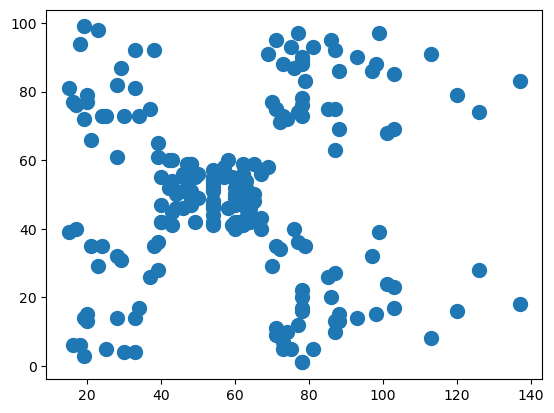

In [25]:
# menampilkan plot cluster berdasarkan annual income dan spending score
plt.scatter(X.iloc[:,1], X.iloc[:,2], s=100)

3. Membuat model K-Means dengan mempertimbangkan jumlah k yang terbaik

f:\Program Files Software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Program Files Software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
f:\Program Files Software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Program Files Software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

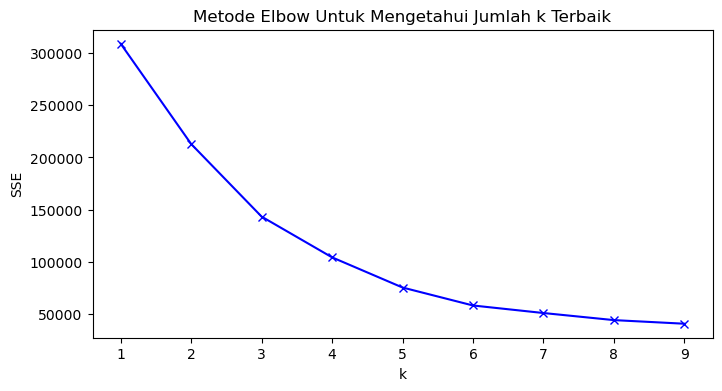

In [19]:
# menggunakan method Elbow untuk mencari k terbaik
# mengelist nilai SSE
sse = []

# mencari k terbaik dari range 1-10
K = range(1,10)

# mengecek nilai SSE dari setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

# Plotting distortion
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow Untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [22]:
# Mengecek nilai SSE setiap k

for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')


k=1; SSE=308812.77999999997
k=2; SSE=212840.16982097187
k=3; SSE=143342.751571706
k=4; SSE=104366.15145556201
k=5; SSE=75493.84464013918
k=6; SSE=58300.44332159069
k=7; SSE=51082.54296792136
k=8; SSE=44307.87341670445
k=9; SSE=40845.91312064747


Dari hasil pertimbangan tersebut k=9 memiliki nilai SSE paling kecil di antara lainnya sehingga k=9 merupakan jumlah k terbaik. Namun, terlalu banyak cluster juga dapat menghasilkan nilai SSE yang rendah, jadi perlu diperhatikan trade-off antara SSE dan jumlah cluster yang sesuai.

melambatnya penurunan SSE pada grafik meng indikasikan bahwa penambahan kluster lebih lanjut tidak dapat memberikan manfaat yang signifikan. Jadi berdasarkan hasil analisis Elbow, k=3 merupakan titik potensial trade-off antara SSE dan jumlah cluster

In [33]:
# inisiasi objek
K = 3 # menggunakan 3 kluster
kmeans = KMeans(n_clusters=K)

# fit dan predict model
y_means = kmeans.fit_predict(X)

f:\Program Files Software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Program Files Software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


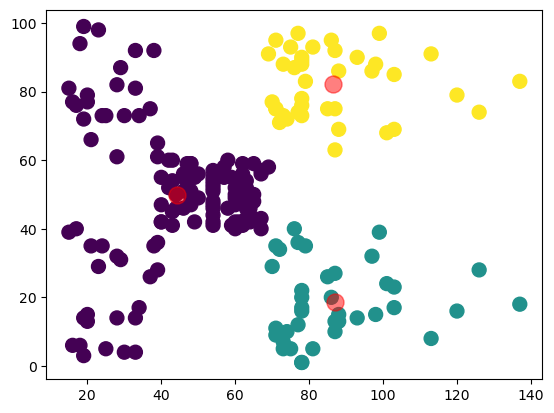

In [34]:
#plot hasil cluster berdasarkan Annual income dan spending score
plt.scatter(X.iloc[:,1], X.iloc[:,2], s=100, c=y_means)

#plot centroid untuk memberikan titik tengah berwarna Merah
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,2], c='red', s=150, alpha=0.5)

In [35]:
# Cek Nilai SSE
print(f'Nilai SSE: {kmeans.inertia_}')

Nilai SSE: 143342.751571706


4. Membuat implementasi model SOM untuk segmentasi citra rose_pink.png

In [36]:
from skimage import io

# membuat fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# membuat fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# membuat fungsi untuk menemukan indeks unit pemenang
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# membuat fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)
    
# membuat fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    # Ukuran SOM sesuai dengan jumlah saluran warna
    som_shape = (10, 10, input_shape[2])
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * \
            np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights


f:\Program Files Software\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [37]:
# load citra Rose_pink.png
Rose_path = "../docs/Rose_pink.png"

# Normalisasi intensitas piksel menjadi rentang [0, 1]
Rose = io.imread(Rose_path) / 255.0


In [38]:
# Latih SOM
num_epochs = 120
initial_learning_rate = 0.1
initial_neighborhood_radius = 5

# menggunakan function train_som yang telah dibuat sebelumnya untuk melatih SOM
trained_weights = train_som(Rose, num_epochs, initial_learning_rate, initial_neighborhood_radius)


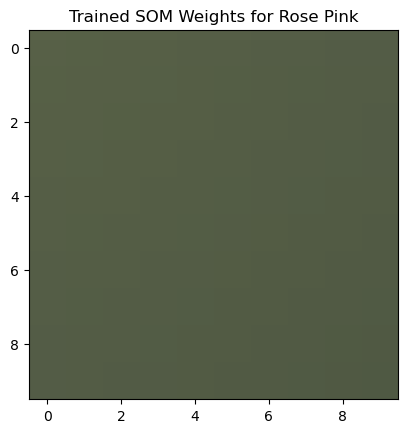

In [39]:
# melakukan visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Rose Pink')
plt.show()
